<a href="https://colab.research.google.com/github/mohansivasai/Pnemonia-Chest-Xrays/blob/master/Pneumonia_Chest_xrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


In [0]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohansivasai12","key":"1f6d572f589dc7339b4e663a3a888b09"}'}

In [3]:
ls -1ha  kaggle.json

kaggle.json


In [0]:
#importing dependencies
import os
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# file configuration
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:00, 58.7MB/s]
100% 2.29G/2.29G [00:30<00:00, 82.0MB/s]


In [0]:
#un-zipping 
import zipfile as zp
local_zip = '/content/chest-xray-pneumonia.zip'
zip_ref = zp.ZipFile(local_zip,'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
#number of training examples
print(len(os.listdir('/content/chest_xray/train/NORMAL')))
print(len(os.listdir('/content/chest_xray/train/PNEUMONIA')))
print(len(os.listdir('/content/chest_xray/test/NORMAL')))
print(len(os.listdir('/content/chest_xray/test/PNEUMONIA')))
print(len(os.listdir('/content/chest_xray/val/NORMAL')))
print(len(os.listdir('/content/chest_xray/val/PNEUMONIA')))

1341
3875
234
390
8
8


In [0]:
train_normal_dir = os.path.join('/content/chest_xray/train/NORMAL')
train_pneumonia_dir = os.path.join('/content/chest_xray/train/PNEUMONIA')

In [0]:
#plotiing images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

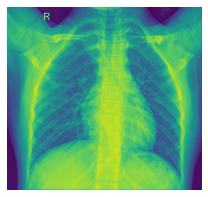

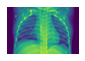

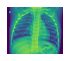

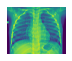

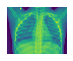

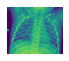

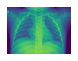

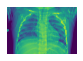

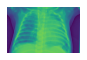

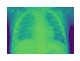

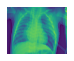

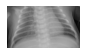

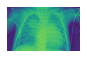

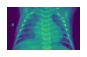

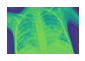

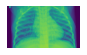

In [15]:
nrows = 4
ncols = 4
pic_index = 0
fig = plt.gcf()
fig.set_size_inches(nrows*4,ncols*4)
pic_index += 8
normal_pix = [os.path.join(train_normal_dir,fname)for fname in os.listdir(train_normal_dir)[pic_index-8:pic_index]]
pneumonia_pix = [os.path.join(train_pneumonia_dir,fname)for fname in os.listdir(train_pneumonia_dir)[pic_index-8:pic_index]]
for i,img_path in enumerate(normal_pix+pneumonia_pix):
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.show()

In [0]:
#defining the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3),activation= 'relu',input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(3,3),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024,activation='relu'),
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0

In [0]:
#compiling the model
model.compile(optimizer= RMSprop(lr = 0.005),loss='binary_crossentropy',metrics=['acc'])

In [16]:
#Using image data generator
train_dir = '/content/chest_xray/train'
val_dir = '/content/chest_xray/val'
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)
validation_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode = 'nearest')
validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [0]:
#training/fitting  the model
hist = model.fit_generator(
    train_generator,
    epochs = 15,
    validation_data = validation_generator,
    verbose = 2
)

Epoch 1/15
Epoch 1/15
163/163 - 80s - loss: 0.4014 - acc: 0.8113 - val_loss: 1.6862 - val_acc: 0.6250
Epoch 2/15
Epoch 1/15
163/163 - 79s - loss: 0.3938 - acc: 0.8240 - val_loss: 1.3527 - val_acc: 0.6250
Epoch 3/15
Epoch 1/15
163/163 - 79s - loss: 0.4102 - acc: 0.8158 - val_loss: 3.6622 - val_acc: 0.7500
Epoch 4/15
Epoch 1/15
163/163 - 79s - loss: 0.3923 - acc: 0.8267 - val_loss: 1.4186 - val_acc: 0.6875
Epoch 5/15
Epoch 1/15
163/163 - 78s - loss: 0.3904 - acc: 0.8305 - val_loss: 1.7864 - val_acc: 0.7500
Epoch 6/15
Epoch 1/15
163/163 - 78s - loss: 0.3679 - acc: 0.8334 - val_loss: 3.5039 - val_acc: 0.7500
Epoch 7/15
Epoch 1/15
163/163 - 79s - loss: 0.3627 - acc: 0.8434 - val_loss: 1.3760 - val_acc: 0.5625
Epoch 8/15
Epoch 1/15
163/163 - 80s - loss: 0.3762 - acc: 0.8507 - val_loss: 1.5263 - val_acc: 0.6875
Epoch 9/15
Epoch 1/15
163/163 - 80s - loss: 0.4256 - acc: 0.8522 - val_loss: 1.3119 - val_acc: 0.7500
Epoch 10/15
Epoch 1/15
163/163 - 81s - loss: 0.3544 - acc: 0.8551 - val_loss: 2.31

No handles with labels found to put in legend.
No handles with labels found to put in legend.


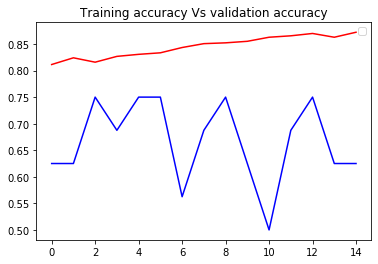

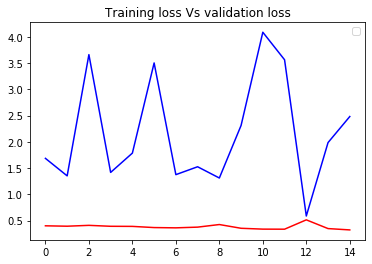

In [0]:
#plotting the accuracy Vs loss 
train_acc = hist.history['acc']
train_loss = hist.history['loss']
val_acc = hist.history['val_acc']
val_loss = hist.history['val_loss']
epochs = range(len(train_acc))
plt.plot(epochs,train_acc,'r')
plt.plot(epochs,val_acc,'b')
plt.legend()
plt.title('Training accuracy Vs validation accuracy')
plt.figure()
plt.plot(epochs,train_loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title('Training loss Vs validation loss')
plt.legend()

In [17]:
#evaluating the model
test_dir = '/content/chest_xray/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_genetor = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 624 images belonging to 2 classes.


In [0]:
pred = model.evaluate_generator(test_genetor)

In [0]:
print('accuracy on test = ',pred[1])
print('loss on test = ',pred[0])

accuracy on test =  0.7548077
loss on test =  0.5212498150765896


Now lets use Transfer learning namely Inception_V3 for this task to improve accuracy

In [18]:
#Using Transfer learing
pre_trained_model = InceptionV3(input_shape = (150,150,3),
                                include_top = False,
                                weights = 'imagenet') 

87916544/87910968 [==============================] - 1s 0us/step


In [19]:
for layer  in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [20]:
last_layer = pre_trained_model.get_layer('mixed9_1')
last_output = last_layer.output
print('last layer outshape = ',last_output.shape)

last layer outshape =  (None, 3, 3, 768)


In [0]:
#adding the deep neural network at last to train with our dataset
x = layers.Flatten()(last_output)
x = layers.Dense(1024)(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1,activation = 'sigmoid')(x)

In [0]:
#compiling the model
model_1 = Model(pre_trained_model.input,x)
model_1.compile(optimizer = Adam(lr= 0.001),loss = 'binary_crossentropy',metrics = ['acc'])


In [0]:
#fitting/Training the model
hist_1 = model_1.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 5,
    verbose = 1

)

Epoch 1/5
   2062/Unknown - 866s 420ms/step - loss: 0.2892 - acc: 0.9072

In [0]:
#plotting the Accuracy and loss
train_acc = hist_1.history['acc']
train_loss = hist_1.history['loss']
val_acc = hist_1.history['val_acc']
val_loss = hist_1.history['val_loss']
epochs = range(len(train_acc))
plt.plot(epochs,train_acc,'r')
plt.plot(epochs,val_acc,'b')
plt.title('Training accuracy Vs validation accuracy')
plt.figure()
plt.plot(epochs,train_loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title('Training loss Vs validation loss')

In [0]:
pred = model_1.evaluate_generator(test_genetor)

In [0]:
print("acc = ",pred[1])
print('loss = ',pred[0])

acc =  0.74038464
loss =  2.660308638215065
